In [182]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import PIL
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.mixture import GaussianMixture
from scipy.stats import multivariate_normal

In [183]:
bird_img = plt.imread('D:\\Downloads\\42049_color.jpg')
plane_img = plt.imread('D:\\Downloads\\3096_color.jpg')

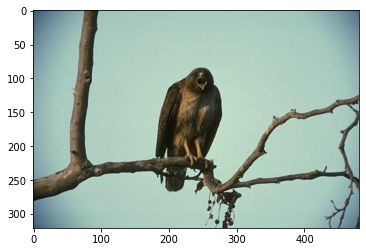

In [184]:
plt.imshow(bird_img)
plt.show()


In [185]:
plane_img.shape

(321, 481, 3)

In [186]:
def raw_feature_vector(img):
    imagepic=[]
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            imagepic.append([i, j] +list(img[i][j]))
    x=np.array(imagepic)
    x = x.astype('float64') 
    #x.dtype = 'float64'
    return x

In [187]:
x = raw_feature_vector(plane_img)
x.shape

(154401, 5)

In [188]:
#Normalizing into hypercube
for i in range(5):
    x[:,i]=(x[:,i]-min(x[:,i]))/float(max(x[:,i])-min(x[:,i]))

In [189]:
x.shape

(154401, 5)

[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 0]]


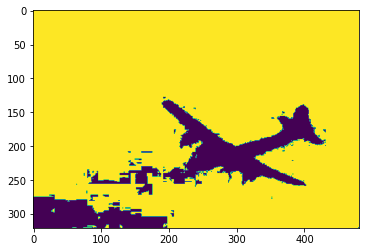

In [190]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=2,covariance_type='full')
gmm.fit(x)
y=gmm.predict(x).reshape(321,481)
print(y)
plt.imshow(y)

In [191]:
kfold = KFold(n_splits=10)
for tr,te in kfold.split(x):
    x_tr,x_te = x[tr],x[te]

In [192]:
def custom_cross_val(X_train,N,k):
    
    for fold in range(k):
        val_data = X_train[fold*(N//k):(fold+1)*(N//k),:]
        train_data = np.concatenate((X_train[:fold*(N//k),:],X_train[(fold+1)*(N//k):,:]),axis = 0)

        #val_label = y_train_enc[fold*(N//k):(fold+1)*(N//k),:]
        #train_label = np.concatenate((y_train_enc[:fold*(N//k),:],y_train_enc[(fold+1)*(N//k):,:]),axis = 0)
        
        
    return val_data,train_data

In [193]:
def GMM(comp,x_train,N,k):
    kfold = KFold(n_splits=10)
    from sklearn.mixture import GaussianMixture
    neg_log_like = []
    for i in comp:
        for tr,te in kfold.split(x):
            x_tr,x_te = x[tr],x[te]
            gmm = GaussianMixture(n_components=i,covariance_type='full',max_iter=200).fit(x_tr)
            labels = gmm.predict(x_tr)
            sc = gmm.score(x_te)
        neg_log_like.append(sc)
    return neg_log_like,gmm

In [194]:
def model_selection(xtrain):
    comp = [1,2,3,4,5,6,7,8,9,10]
    nll1 = []
    neg_log_like1,gmm1 = GMM(comp,xtrain,xtrain.shape[0],10)
    for k in range(0,len(comp)):
        z = k*10
        comp_nll1 = np.average(neg_log_like1[k:k+10])
        nll1.append(comp_nll1)
    n_c = np.argmax(nll1)
    plt.bar(comp,nll1)
    plt.xlabel('number of components')
    plt.ylabel('Log Likelihood')
    return n_c

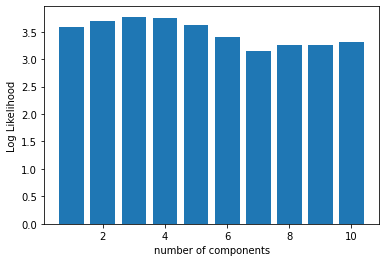

In [195]:
n_c = model_selection(x)

In [196]:
n_c

2

In [197]:
comp = [1,2,3,4,5,6,7,8,9,10]
k = comp[n_c]

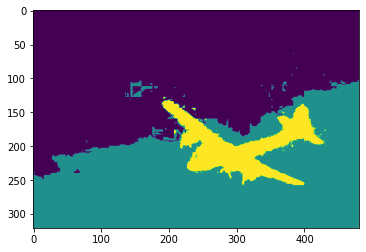

In [213]:
best_gmm = GaussianMixture(n_components=k,covariance_type='full').fit(x)
best_y=best_gmm.predict(x).reshape(321,481)
plt.imshow(best_y)

In [199]:
z = raw_feature_vector(bird_img)
for i in range(5):
    z[:,i]=(z[:,i]-min(z[:,i]))/float(max(z[:,i])-min(z[:,i]))

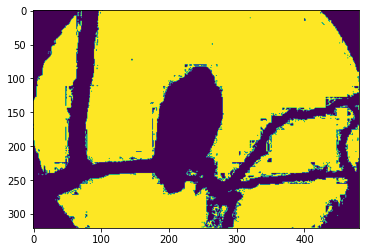

In [200]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=2,covariance_type='full')
gmm.fit(z)
y_b=gmm.predict(z).reshape(321,481)
plt.imshow(y_b)

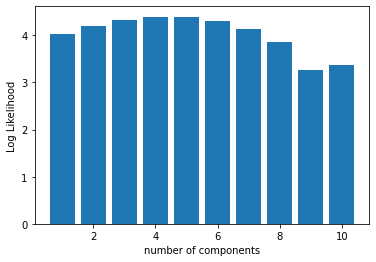

In [219]:
n_c_b = model_selection(z)

In [220]:
comp[n_c_b]

4

[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


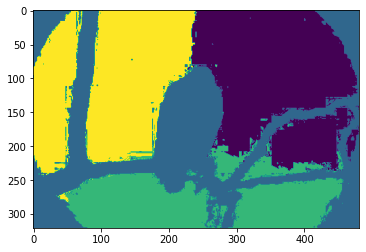

In [221]:
best_gmm_b = GaussianMixture(n_components=comp[n_c_b],covariance_type='full').fit(z)
best_y_b=best_gmm_b.predict(z).reshape(321,481)
print(best_y_b)
plt.imshow(best_y_b)

In [222]:
MAP_bird = best_gmm_b.predict(z)
MAP_bird = pd.DataFrame(MAP_bird,columns=['cluster'])
MAP_plane = best_gmm.predict(x)
MAP_plane = pd.DataFrame(MAP_plane,columns=['cluster'])

In [228]:
(MAP_bird['cluster']==3).sum()

38417